In [ ]:
#ref: https://www.kaggle.com/datasets/tunguz/big-five-personality-test

In [6]:
#dataset = [
 #   {"personality_trait": "openness", "color_palette": [("#FF5733"), ("#00FF00"), ("#0000FF")]},
  #  {"personality_trait": "conscientiousness", "color_palette": [("#FFC0CB"), ("#800080"), ("#FFA500")]},
   # {"personality_trait": "extraversion", "color_palette": [("#FF69B4"), ("#40E0D0"), ("#FF00FF")]},
    #{"personality_trait": "agreeableness", "color_palette": [("#FFD700"), ("#FFA500"), ("#87CEEB")]},
    #{"personality_trait": "neuroticism", "color_palette": [("#8B4513"), ("#A0522D"), ("#D2691E")]}


In [7]:
#data set of personlaity trait scores, users answeirng questions from a scale of 1-5 questions that are most relevant to them 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:

data = pd.read_csv('/Users/saruttayathiankaew/Documents/GitHub/Personalisation-22-23/data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()


Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


In [9]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [10]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [11]:
#Load in questions databank
import json
with open("/Users/saruttayathiankaew/Documents/GitHub/Personalisation-22-23/data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [12]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

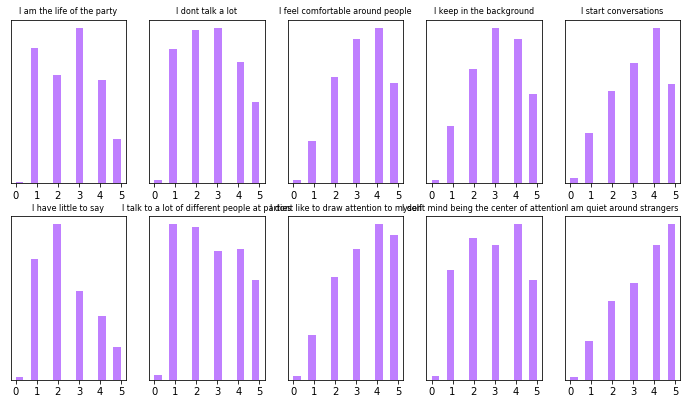

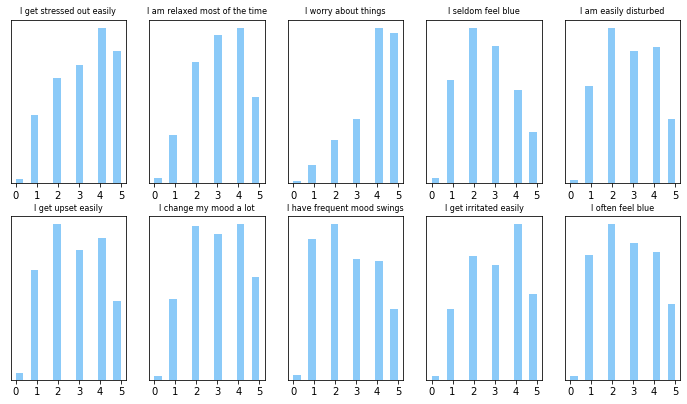

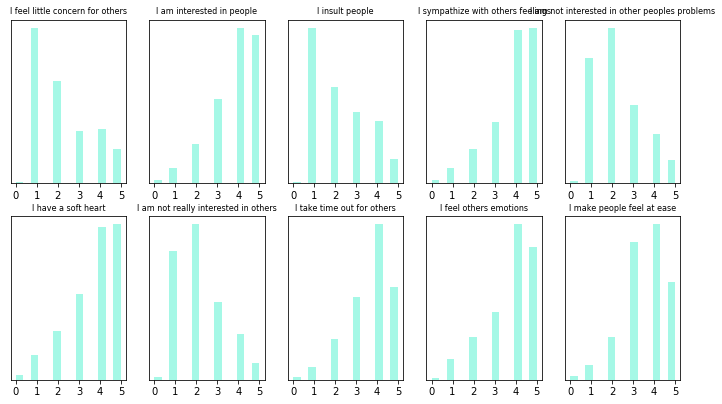

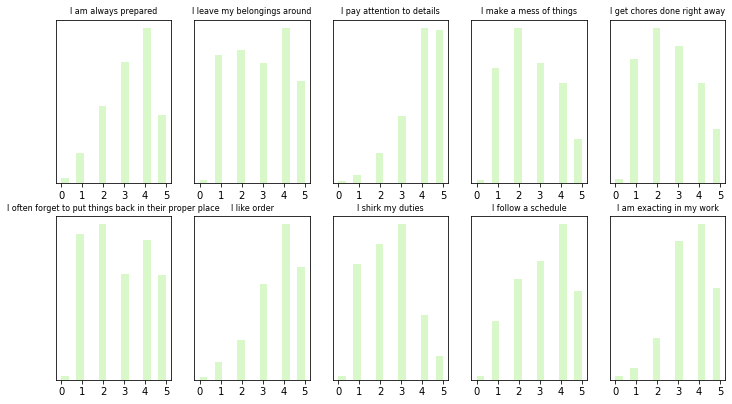

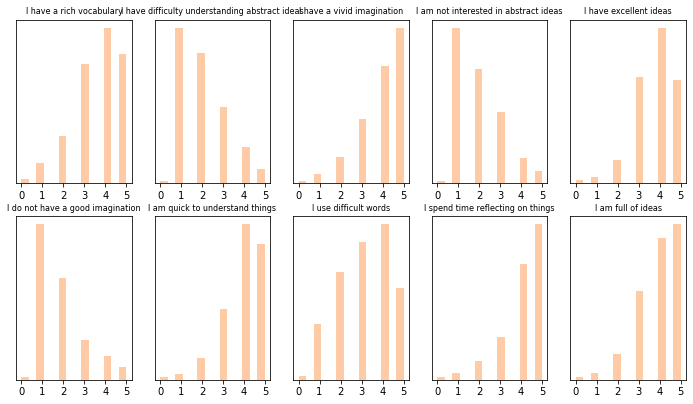

In [13]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5)) 

In [14]:
# cluster 

# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [15]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [16]:

import warnings
warnings.filterwarnings("ignore")

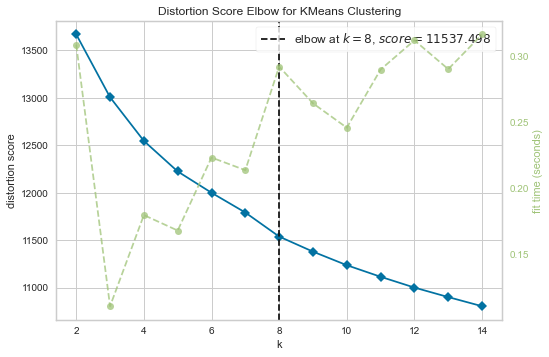

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [18]:
# k-mean 

# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [19]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,0
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,0
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,2
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,2


In [20]:
# how many individuals are in each cluster 

df_model.Clusters.value_counts()

1    10366
3    10128
0    10000
4     9806
2     9606
Name: Clusters, dtype: int64

In [21]:
#grouping the result according to cluster, to see average answer to each questions for each cluster 
# the intuition on how we classify people 

pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,516199.255700,2.644900,2.757600,3.282400,3.125800,3.286000,2.402500,2.787400,3.419100,2.978800,3.532200,3.287000,3.167400,3.834100,2.677200,2.842800,2.833500,3.042700,2.672900,3.090900,2.779100,2.278100,3.830200,2.252700,3.910200,2.252400,3.741400,2.201700,3.683900,3.781500,3.600300,3.289100,2.898900,3.994400,2.598500,2.644600,2.822000,3.719000,2.470400,3.211200,3.590100,3.645300,2.064700,4.004200,1.991200,3.817300,1.894900,3.967300,3.190400,4.126500,3.986100
1,104467.120779,2.625024,2.823654,3.270307,3.189948,3.239822,2.503183,2.765966,3.444144,2.977040,3.585279,3.216766,3.248022,3.828671,2.681169,2.806869,2.828285,3.055373,2.660814,3.101775,2.757187,2.299730,3.789022,2.353849,3.890122,2.308123,3.720143,2.238568,3.650010,3.741945,3.544086,3.264904,2.963824,3.933726,2.641134,2.562801,2.846325,3.675478,2.505595,3.147501,3.548042,3.639784,2.109589,3.987652,2.069458,3.754389,1.922149,3.969902,3.156762,4.078333,3.910862
2,914715.470747,2.663544,2.745888,3.324797,3.133042,3.315011,2.332396,2.789090,3.393296,2.973454,3.541849,3.296377,3.139080,3.864876,2.631793,2.830210,2.830731,3.034249,2.667812,3.052571,2.780762,2.193317,3.877160,2.176869,3.973246,2.239538,3.775245,2.164897,3.730377,3.824797,3.621382,3.358734,2.910369,3.993546,2.547158,2.687071,2.776286,3.750260,2.392775,3.271289,3.643764,3.702374,2.029148,4.007495,1.926817,3.836873,1.870185,4.012909,3.225276,4.179575,3.992817
3,311856.570201,2.672393,2.759479,3.296998,3.144550,3.291469,2.430194,2.799269,3.423578,2.956951,3.538705,3.323558,3.148203,3.886947,2.713369,2.894451,2.901165,3.090837,2.733807,3.107820,2.773006,2.326817,3.821682,2.259676,3.935821,2.272216,3.772216,2.192536,3.693622,3.813981,3.611868,3.280016,2.925849,3.995656,2.668148,2.691844,2.859202,3.686019,2.491311,3.194115,3.588369,3.611276,2.175750,3.988349,2.099131,3.759182,1.911335,3.939968,3.106438,4.074842,3.933254
4,717414.204467,2.637773,2.765960,3.249031,3.140118,3.264022,2.348256,2.738018,3.393127,2.966653,3.560473,3.290128,3.120131,3.841628,2.619621,2.822456,2.825515,3.050173,2.698144,3.103304,2.804303,2.221293,3.833469,2.288599,3.929635,2.279727,3.716296,2.197430,3.680808,3.774628,3.580971,3.311136,2.977361,3.979910,2.613196,2.592290,2.859678,3.681114,2.458087,3.179686,3.604732,3.719865,1.991026,4.026616,1.908831,3.830614,1.877320,4.006119,3.286967,4.194269,4.004895


In [22]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.668450,3.098070,3.071120,3.124840,3.229190
1,2.683909,3.101302,3.074870,3.108538,3.223606
2,2.667052,3.088955,3.073621,3.130887,3.243442
3,2.677488,3.133886,3.086157,3.140403,3.225464
4,2.650296,3.093157,3.072619,3.123343,3.244636


In [23]:
highest_scores = data_sums.groupby('clusters').idxmax()

# Extract individuals with the highest scores for each personality trait
extroversion_max = data_sums.loc[highest_scores['extroversion']]
neurotic_max = data_sums.loc[highest_scores['neurotic']]
agreeable_max = data_sums.loc[highest_scores['agreeable']]
conscientious_max = data_sums.loc[highest_scores['conscientious']]
open_max = data_sums.loc[highest_scores['open']]

In [24]:

personality_traits = []

for index, row in data_sums.iterrows():
    extroversion = row['extroversion']
    neuroticism = row['neurotic']
    agreeableness = row['agreeable']
    conscientiousness = row['conscientious']
    openness = row['open']
    
    trait = ""
    
    if extroversion == max(extroversion, neuroticism, agreeableness, conscientiousness, openness):
        trait = "Extroversion"
    elif neuroticism == max(extroversion, neuroticism, agreeableness, conscientiousness, openness):
        trait = "Neuroticism"
    elif agreeableness == max(extroversion, neuroticism, agreeableness, conscientiousness, openness):
        trait = "Agreeableness"
    elif conscientiousness == max(extroversion, neuroticism, agreeableness, conscientiousness, openness):
        trait = "Conscientiousness"
    else:
        trait = "Openness"
    
    personality_traits.append(trait)

# Add the generated personality trait column to the DataFrame
data_sums['personality_trait'] = personality_traits

# Print the updated DataFrame
print(data_sums)

       extroversion  neurotic  agreeable  conscientious  open  clusters  \
0               2.4       3.6        2.9            2.1   2.5         0   
1               2.5       3.5        3.2            3.3   3.4         4   
2               3.2       2.5        3.3            3.0   3.2         0   
3               2.3       2.6        2.6            2.7   3.3         2   
4               2.3       3.2        2.7            2.8   2.6         2   
...             ...       ...        ...            ...   ...       ...   
49995           3.3       4.2        3.4            3.4   2.1         4   
49996           2.0       3.9        3.5            3.2   2.9         0   
49997           2.9       3.4        3.6            3.6   3.5         4   
49998           3.2       2.2        2.9            3.6   3.7         3   
49999           3.0       2.3        3.1            3.2   3.4         3   

      personality_trait  
0           Neuroticism  
1           Neuroticism  
2         Agreeablene

In [25]:
extroversion_data = data_sums[data_sums['personality_trait'] == 'Extroversion']

print(extroversion_data[['extroversion', 'personality_trait']])


       extroversion personality_trait
66              3.2      Extroversion
109             2.9      Extroversion
113             3.1      Extroversion
123             3.9      Extroversion
146             3.4      Extroversion
...             ...               ...
49885           0.0      Extroversion
49900           3.3      Extroversion
49931           3.1      Extroversion
49943           3.3      Extroversion
49980           3.2      Extroversion

[1674 rows x 2 columns]


In [26]:
conscientiousness_data = data_sums[data_sums['personality_trait'] == 'Conscientiousness']
print(conscientiousness_data[['conscientious', 'personality_trait']])


       conscientious  personality_trait
7                3.2  Conscientiousness
11               3.5  Conscientiousness
14               3.9  Conscientiousness
28               3.8  Conscientiousness
29               3.3  Conscientiousness
...              ...                ...
49972            3.1  Conscientiousness
49974            3.3  Conscientiousness
49986            3.7  Conscientiousness
49989            3.4  Conscientiousness
49993            3.4  Conscientiousness

[9242 rows x 2 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


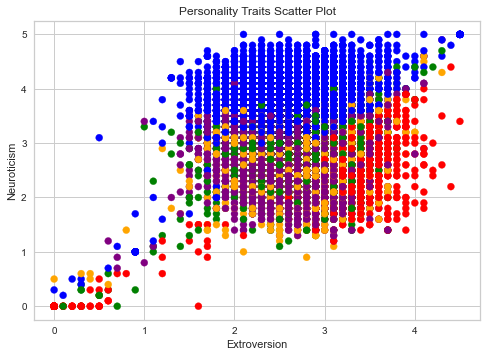

In [28]:
import matplotlib.pyplot as plt

# Define colors for each personality trait
colors = {'Extroversion': 'red', 'Neuroticism': 'blue', 'Agreeableness': 'green', 'Conscientiousness': 'orange', 'Openness': 'purple'}

# Create a scatter plot of extroversion vs. neuroticism with color-coded personality traits
plt.scatter(data_sums['extroversion'], data_sums['neurotic'], c=data_sums['personality_trait'].apply(lambda x: colors[x]))

# Add labels and legend to the plot
plt.xlabel('Extroversion')
plt.ylabel('Neuroticism')
plt.title('Personality Traits Scatter Plot')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


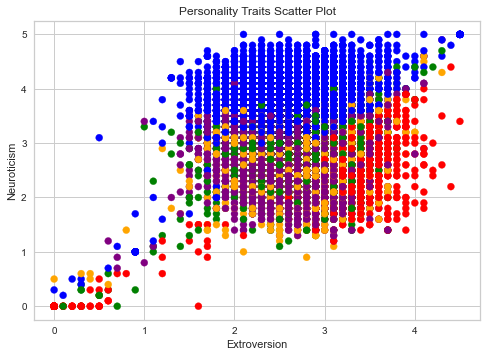

In [30]:
import matplotlib.pyplot as plt

# Define colors for each personality trait
colors = {'Extroversion': 'red', 'Neuroticism': 'blue', 'Agreeableness': 'green', 'Conscientiousness': 'orange', 'Openness': 'purple'}

# Create a scatter plot of extraversion vs. neuroticism with color-coded personality traits
plt.scatter(data_sums['extroversion'], data_sums['neurotic'], c=data_sums['personality_trait'].apply(lambda x: colors[x]))

# Add labels and legend to the plot
plt.xlabel('Extroversion')
plt.ylabel('Neuroticism')
plt.title('Personality Traits Scatter Plot')
plt.legend()

# Show the plot
plt.show()

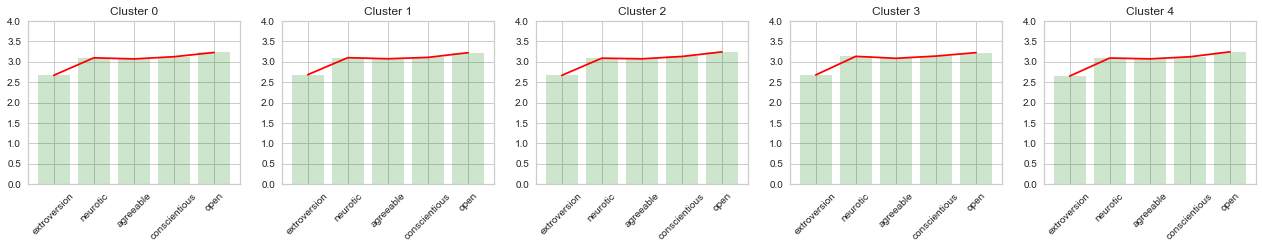

In [31]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

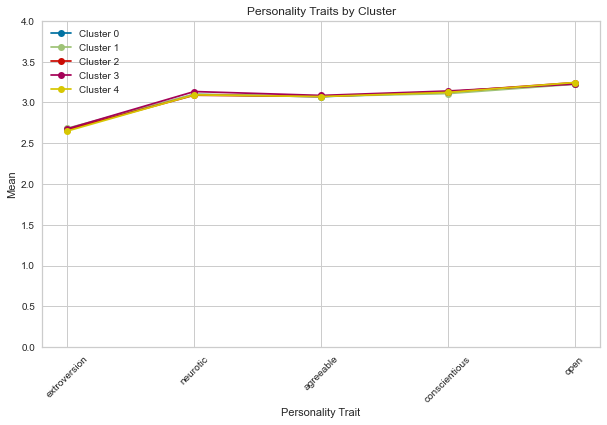

In [32]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(10,6))
for i in range(0, 5):
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], '-o', label='Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)
plt.legend()
plt.title('Personality Traits by Cluster')
plt.xlabel('Personality Trait')
plt.ylabel('Mean')
plt.show()